<a href="https://colab.research.google.com/github/Muhammad-Lutfi-2002/Data_analytics/blob/main/starbuck_analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

# Section 1: Data Loading and Initial Exploration

    # Read the data
df = pd.read_csv('starbucks.csv')

    # Display basic information about the dataset
print("Dataset Information:")
print(df.info())

print("\nFirst few rows:")
print(df.head())

print("\nBasic statistics:")
print(df.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           24

#Section 2: Data Preprocessing

In [7]:
# Clean the column names by stripping leading/trailing spaces
df.columns = df.columns.str.strip()

# Check the actual column names in the DataFrame
print(df.columns)

# Define numerical columns
numerical_columns = ['Calories', 'Total Fat (g)', 'Total Carbohydrates (g)',
                     'Cholesterol (mg)', 'Sodium (mg)', 'Sugars (g)',
                     'Protein (g)', 'Caffeine (mg)']

# Create a copy of numerical data only if columns exist in the DataFrame
existing_columns = [col for col in numerical_columns if col in df.columns]
data_for_clustering = df[existing_columns].copy()

# Convert columns to numeric, forcing errors to NaN
data_for_clustering = data_for_clustering.apply(pd.to_numeric, errors='coerce')

# Handle missing values
data_for_clustering = data_for_clustering.fillna(data_for_clustering.mean())

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Output scaled data
print(scaled_data)

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Vitamin A (% DV)', 'Vitamin C (% DV)',
       'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)'],
      dtype='object')
[[-1.85943369 -0.95422718 -1.50833768 ... -1.67414054 -1.37373195
   1.39141545]
 [-1.8496919  -0.95422718 -1.44746081 ... -1.67414054 -1.33259309
   2.77502649]
 [-1.83995011 -0.95422718 -1.44746081 ... -1.67414054 -1.22974594
   3.91447087]
 ...
 [ 0.05969865  0.20293391  0.37884532 ...  0.25583268 -0.81835733
  -1.45719551]
 [-0.13513712 -0.47774908  0.37884532 ...  0.10346638 -0.81835733
  -1.45719551]
 [ 0.44937019 -0.95422718  1.23112151 ...  1.11924176 -0.40696873
  -1.45719551]]


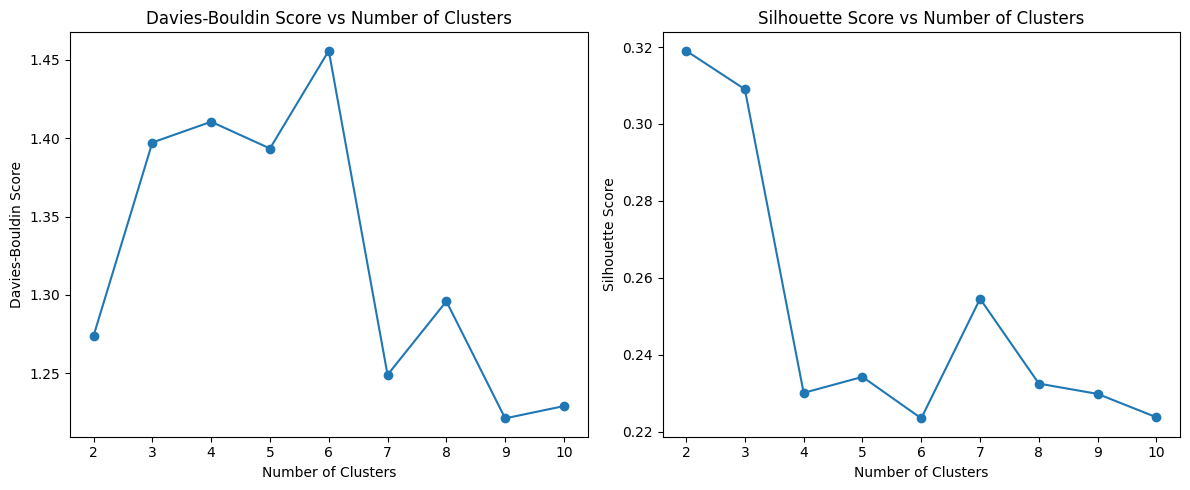

Optimal number of clusters: 9


In [10]:
# Determine the optimal number of clusters using Davies-Bouldin and Silhouette scores
max_clusters = 10
davies_bouldin_scores = []
silhouette_scores = []

for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)

    davies_bouldin_scores.append(davies_bouldin_score(scaled_data, labels))
    silhouette_scores.append(silhouette_score(scaled_data, labels))

# Plot the scores
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, max_clusters + 1), davies_bouldin_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Score vs Number of Clusters')

plt.subplot(1, 2, 2)
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')

plt.tight_layout()
plt.show()

optimal_clusters = davies_bouldin_scores.index(min(davies_bouldin_scores)) + 2
print(f"Optimal number of clusters: {optimal_clusters}")

In [12]:
# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)


Cluster Characteristics:

Cluster 0 characteristics:
Calories                   274.444444
Trans Fat (g)                4.129630
Saturated Fat (g)            0.196296
Sodium (mg)                 26.111111
Total Carbohydrates (g)    165.370370
Cholesterol (mg)            41.592593
Dietary Fibre (g)            0.518519
Sugars (g)                  38.518519
Protein (g)                 12.037037
Name: 0, dtype: float64
Number of products: 27

Top products in this cluster:
Beverage
White Chocolate Mocha (Without Whipped Cream)    4
Caffè Latte                                      3
Caffè Mocha (Without Whipped Cream)              3
Vanilla Latte (Or Other Flavoured Latte)         3
Caramel Macchiato                                3
Name: count, dtype: int64

Cluster 1 characteristics:
Calories                   190.465116
Trans Fat (g)                0.797674
Saturated Fat (g)            0.012791
Sodium (mg)                  3.604651
Total Carbohydrates (g)    132.674419
Cholesterol (mg)  

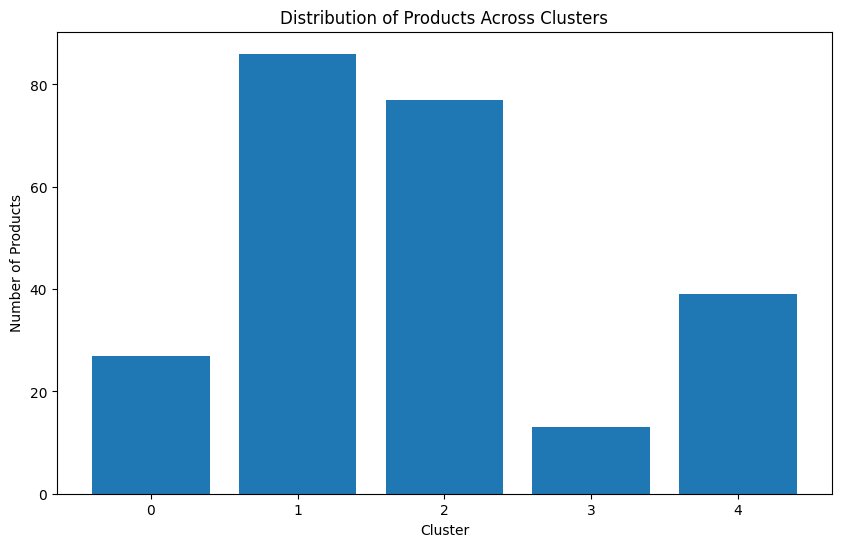

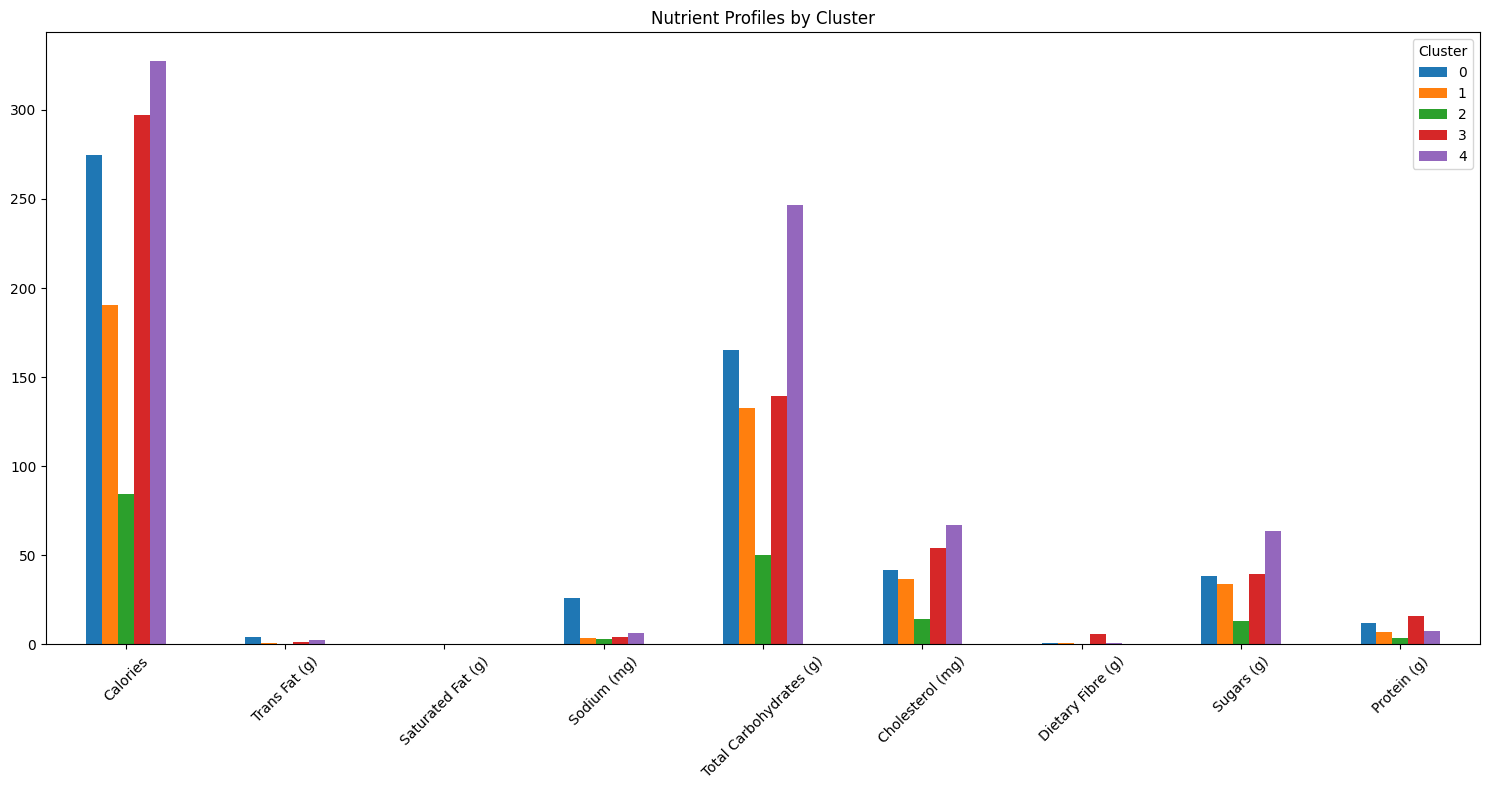

In [15]:
# Convert categorical columns to numerical
df_encoded = pd.get_dummies(df, columns=['Beverage_category', 'Beverage', 'Beverage_prep'])

# Identify numerical columns
numerical_cols = df_encoded.select_dtypes(include=np.number).columns.tolist()

# Scale the numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded[numerical_cols])

# Clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init = 'auto')
kmeans.fit(scaled_features)
cluster_labels = kmeans.labels_

# Add cluster labels to the original dataframe
df_with_clusters = df.copy()
df_with_clusters['Cluster'] = cluster_labels

# Calculate cluster centers in original scale
cluster_centers_scaled = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=numerical_cols  # Ensure numerical_cols is defined here
)

# Cluster characteristics
print("\nCluster Characteristics:")
for i in range(len(cluster_centers_scaled)):
    print(f"\nCluster {i} characteristics:")
    print(cluster_centers_scaled.iloc[i])
    print(f"Number of products: {sum(cluster_labels == i)}")
    print("\nTop products in this cluster:")
    print(df_with_clusters[df_with_clusters['Cluster'] == i]['Beverage'].value_counts().head())

# Visualizations
# 1. Cluster sizes
plt.figure(figsize=(10, 6))
plt.bar(range(len(cluster_centers_scaled)),
        [sum(cluster_labels == i) for i in range(len(cluster_centers_scaled))])
plt.xlabel('Cluster')
plt.ylabel('Number of Products')
plt.title('Distribution of Products Across Clusters')
plt.show()

# 2. Nutrient profiles by cluster
plt.figure(figsize=(15, 8))
cluster_centers_scaled.T.plot(kind='bar', ax=plt.gca())
plt.title('Nutrient Profiles by Cluster')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           24

NameError: name 'preprocess_data' is not defined